# Sentiment Analyis Using Natural Language Processing a Machine Learning Technique

- STEPS --
1. Gather and Explore the dataset.

In [1]:
# Importing the pandas library to see our data in the dataframe format..
import pandas as pd
raw_df = pd.read_csv('Sentiment_dataset.csv', encoding = 'ISO-8859-1')

In [2]:
#Let's see our data.
raw_df

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [3]:
#Let's change some of the columns name like from '0' to 'Target' and the Sentiment Column also for the clarity..
raw_df['Target'] = raw_df['0']
raw_df['Sentiments'] = raw_df['@switchfoot http://twitpic.com/2y1zl - Awww, that\'s a bummer.  You shoulda got David Carr of Third Day to do it. ;D']

In [4]:
# Dropping the unwanted columns from the dataset..
raw_df = raw_df.drop(columns=['0'])
raw_df = raw_df.drop(columns=['@switchfoot http://twitpic.com/2y1zl - Awww, that\'s a bummer.  You shoulda got David Carr of Third Day to do it. ;D'])

- Here in our dataset, 0 = Negative and 4 = Positive

<Axes: xlabel='Target'>

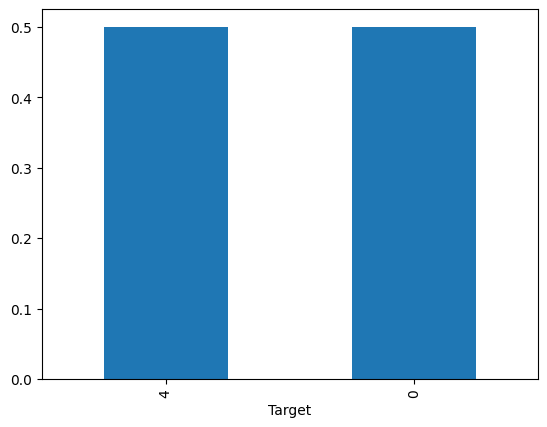

In [5]:
#Now let's see the distribution of the sentiment on the tweets.
raw_df['Target'].value_counts(normalize=True).plot(kind='bar') #for viewing the probabilty distribution.

In [6]:
# Information about our data.
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column                        Non-Null Count    Dtype 
---  ------                        --------------    ----- 
 0   1467810369                    1599999 non-null  int64 
 1   Mon Apr 06 22:19:45 PDT 2009  1599999 non-null  object
 2   NO_QUERY                      1599999 non-null  object
 3   _TheSpecialOne_               1599999 non-null  object
 4   Target                        1599999 non-null  int64 
 5   Sentiments                    1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


2. Implement TF-IDF technique for implementing the Vocabulary for our data.

- Creating the custom tokenizer with stemming.


In [7]:
##Using the nltk library for implementing this task.
import nltk 
from nltk.tokenize import word_tokenize # For Tokening the words from the sentences.
from nltk.stem.snowball import SnowballStemmer #For stemming the tokens.
stemmer = SnowballStemmer(language='english') #instance of stemming class.

In [8]:
#Let's go with some of the stopwords, as this are one of the important factors in the sentiment analysis.
from nltk.corpus import stopwords
english_stopwords = stopwords.words('english')
print(", ".join(english_stopwords))

a, about, above, after, again, against, ain, all, am, an, and, any, are, aren, aren't, as, at, be, because, been, before, being, below, between, both, but, by, can, couldn, couldn't, d, did, didn, didn't, do, does, doesn, doesn't, doing, don, don't, down, during, each, few, for, from, further, had, hadn, hadn't, has, hasn, hasn't, have, haven, haven't, having, he, he'd, he'll, her, here, hers, herself, he's, him, himself, his, how, i, i'd, if, i'll, i'm, in, into, is, isn, isn't, it, it'd, it'll, it's, its, itself, i've, just, ll, m, ma, me, mightn, mightn't, more, most, mustn, mustn't, my, myself, needn, needn't, no, nor, not, now, o, of, off, on, once, only, or, other, our, ours, ourselves, out, over, own, re, s, same, shan, shan't, she, she'd, she'll, she's, should, shouldn, shouldn't, should've, so, some, such, t, than, that, that'll, the, their, theirs, them, themselves, then, there, these, they, they'd, they'll, they're, they've, this, those, through, to, too, under, until, up, v

In [9]:
# Taking the first 115 words which will certainly have most of the negative words..
selected_stopwords = english_stopwords[:115]
print(", ".join(selected_stopwords))

a, about, above, after, again, against, ain, all, am, an, and, any, are, aren, aren't, as, at, be, because, been, before, being, below, between, both, but, by, can, couldn, couldn't, d, did, didn, didn't, do, does, doesn, doesn't, doing, don, don't, down, during, each, few, for, from, further, had, hadn, hadn't, has, hasn, hasn't, have, haven, haven't, having, he, he'd, he'll, her, here, hers, herself, he's, him, himself, his, how, i, i'd, if, i'll, i'm, in, into, is, isn, isn't, it, it'd, it'll, it's, its, itself, i've, just, ll, m, ma, me, mightn, mightn't, more, most, mustn, mustn't, my, myself, needn, needn't, no, nor, not, now, o, of, off, on, once, only, or, other, our


In [10]:
# Now let's define the helper function for implementing the both tokenization and stemming..
def tokenize(text):
    return [stemmer.stem(word) for word in word_tokenize(text)]


- Now let's immplement the TF-IDF method for making the vocabulary for our model 

In [11]:
# Making the TF-IDF vectorizer for making the vocabulary for our model..
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer=tokenize,
                             stop_words=selected_stopwords,
                             ngram_range=(1,2),
                             max_features=5000)

In [12]:
#Now let's fit our vectorizer into the our training dataset..
vectorizer.fit(raw_df.Sentiments)

c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_extraction\text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'m", "'s", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', "n't", 'need', 'onc', 'onli', 've'] not in stop_words.
  warnings.warn(


TfidfVectorizer(max_features=5000, ngram_range=(1, 2),
                stop_words=['a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...],
                tokenizer=<function tokenize at 0x000001D3C3CF5D00>)

In [13]:
len(vectorizer.get_feature_names_out())

5000

In [14]:
vectorizer.get_feature_names_out()[:120]

array(['!', '! !', '! #', '! &', "! 'm", "! 's", '! (', '! )', '! *',
       '! ,', '! -', '! .', '! ..', '! ...', '! :', '! ;', '! ?', '! @',
       '! also', '! back', '! ca', '! cant', '! check', '! come',
       '! could', '! damn', '! dont', '! enjoy', '! feel', '! final',
       '! fun', '! get', '! glad', '! go', '! gon', '! good', '! got',
       '! great', '! guess', '! haha', '! hahaha', '! happi', '! hate',
       '! hehe', '! hope', '! http', '! im', '! keep', '! know', '! let',
       '! like', '! lol', '! look', '! love', '! make', '! mayb',
       '! miss', "! n't", '! need', '! nice', '! oh', '! omg', '! one',
       '! onli', '! pleas', '! poor', '! realli', '! sad', '! see',
       '! she', '! should', '! so', '! sorri', '! still', '! take',
       '! thank', '! that', '! the', '! then', '! there', '! they',
       '! think', '! this', '! thought', '! time', '! to', '! too',
       '! tri', '! u', '! ugh', '! ve', '! veri', '! wan', '! want',
       '! was', '! watch'

In [15]:
# Transforming the Sentiments into the vectors using the tf-idf vectorizer
inputs = vectorizer.transform(raw_df.Sentiments)

In [16]:
# Checking the shape of the inputs..
inputs.shape

(1599999, 5000)

- Now let's spllit the data into the Train, Validation and Test Sets..

In [17]:
raw_df

,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,Target,Sentiments
0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,0,is upset that he can't update his Facebook by ...
1,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,0,@Kenichan I dived many times for the ball. Man...
2,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,0,my whole body feels itchy and like its on fire
3,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,0,"@nationwideclass no, it's not behaving at all...."
4,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,0,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,4,Just woke up. Having no school is the best fee...
1599995,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,4,TheWDB.com - Very cool to hear old Walt interv...
1599996,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,4,Are you ready for your MoJo Makeover? Ask me f...
1599997,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,4,Happy 38th Birthday to my boo of alll time!!! ...


- We can split the data randomly in this case because of the distribution is not random and creates problem if we split the dataset sequencially.


In [18]:
#splitting using the skicit learn library.
from sklearn.model_selection import train_test_split
train_val_inputs, test_inputs, train_val_targets, test_targets = train_test_split(inputs, raw_df.Target, test_size=0.2, random_state=29)
train_inputs, val_inputs, train_targets, val_targets = train_test_split(train_val_inputs, train_val_targets, test_size=0.2, random_state=29)

In [19]:
# Checking the test set..
test_inputs.shape, test_targets.shape

((320000, 5000), (320000,))

In [20]:
test_targets

941529    4
790494    0
487958    0
727538    0
417660    0
         ..
52865     0
840496    4
857196    4
951964    4
828306    4
Name: Target, Length: 320000, dtype: int64

In [21]:
# Checking the train set..
train_inputs.shape, train_targets.shape

((1023999, 5000), (1023999,))

In [22]:
train_targets

672198     0
460342     0
83564      0
648978     0
174841     0
          ..
1102242    4
23477      0
603106     0
741594     0
1327704    4
Name: Target, Length: 1023999, dtype: int64

In [23]:
# Checking the validation set..
val_inputs.shape, val_targets.shape

((256000, 5000), (256000,))

In [24]:
val_targets

664290     0
115114     0
858522     4
623931     0
493342     0
          ..
781104     0
106587     0
1509761    4
559727     0
1342573    4
Name: Target, Length: 256000, dtype: int64

## Training the ML models

## Training the baseline model  --> Logistic Regression Model

In [25]:
from sklearn.linear_model import LogisticRegression as LR 
model1 = LR()

In [26]:
#Helper function for model hyperparameters tuning.
from sklearn.metrics import accuracy_score, f1_score
def evaluate_model(model,train_inputs, val_inputs, train_targets, val_targets):

    #Fitting the model to the traning data and predicting the vallues on training and validation sets.
    model.fit(train_inputs, train_targets)
    train_preds = model.predict(train_inputs)
    val_preds = model.predict(val_inputs)

    #Evaluation of the model on the train and val set..
    #Evaluation of the model using the accuracy score and F1-Score
    from sklearn.metrics import accuracy_score, f1_score
    train_acc = accuracy_score(train_targets, train_preds)
    train_f1 = f1_score(train_targets, train_preds, average='weighted')
    val_acc = accuracy_score(val_targets, val_preds)
    val_f1 = f1_score(val_targets, val_preds, average = 'weighted')

    return f"Train Acc: {train_acc} | Train F1: {train_f1} | Val Acc: {val_acc} | Val F1: {val_f1}"

In [27]:
evaluate_model(model1, train_inputs, val_inputs, train_targets, val_targets)

'Train Acc: 0.7897068258855722 | Train F1: 0.7896296394622137 | Val Acc: 0.787578125 | Val F1: 0.7875035901569094'

- On our Logistic Regression Model the accuracy and f1 score on train and validation set is around 78.65, which is not good but not so bad..

## Training on a tree based models --> 1. Decision Trees and 2. Random Forest

In [28]:
# Training on a Decision Tree model.
from sklearn.tree import DecisionTreeClassifier as DC 
model2 = DC(max_depth=200, max_leaf_nodes=2000, random_state=29)

In [29]:
evaluate_model(model2, train_inputs, val_inputs, train_targets, val_targets)

'Train Acc: 0.7478698709666709 | Train F1: 0.7478400261207747 | Val Acc: 0.73637109375 | Val F1: 0.7363382805012559'

In [30]:
# Training on a Random Forest model.
from sklearn.ensemble import RandomForestClassifier
model3 =  RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=29)

In [31]:
evaluate_model(model2, train_inputs, val_inputs, train_targets, val_targets)

'Train Acc: 0.7478698709666709 | Train F1: 0.7478400261207747 | Val Acc: 0.73637109375 | Val F1: 0.7363382805012559'